In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [2]:
data = np.load('./data/data_100_100_norm.npz')

In [3]:
data.files

['arr_0', 'arr_1']

In [4]:
X = data['arr_0'] ## Dependent Variable
y = data['arr_1'] ## Target Variable

In [5]:
X.shape , y.shape

((5454, 10000), (5454,))

## Eigen Images

In [6]:
X1 = X - X.mean(axis=0)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=None , whiten=True , svd_solver='auto')

In [9]:
x_pca = pca.fit_transform(X1)

In [10]:
x_pca.shape

(5454, 5454)

In [11]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

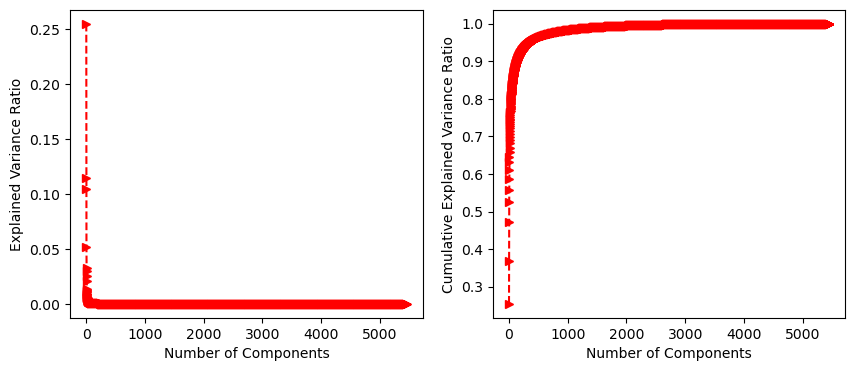

In [17]:
plt.figure(figsize=(10 , 4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio , 'r>--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum , 'r>--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

## Conclusion :
### Using Elbow method , consider number of components is between 25-30
### Since If we consider component between 25 to 30 , the explained variance is around 75% , So in order to get minimum 80% variance , We will be considering 50 components

In [18]:
pca_50 = PCA(n_components=50 , whiten=True , svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [19]:
x_pca_50.shape

(5454, 50)

In [20]:
import pickle

In [21]:
pickle.dump(pca_50 , open('./model/pca_50.pickle' , 'wb'))

### Considering 50 components and inverse transforming it

In [23]:
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [24]:
x_pca_inv.shape

(5454, 10000)

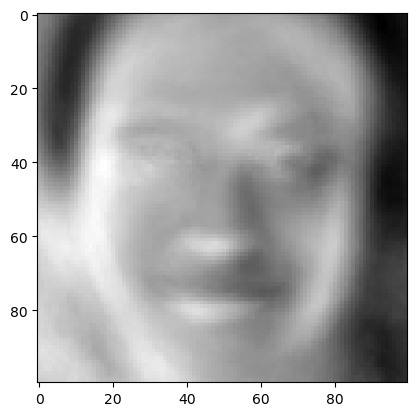

In [26]:
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100 , 100))
plt.imshow(eig_img , cmap='gray')

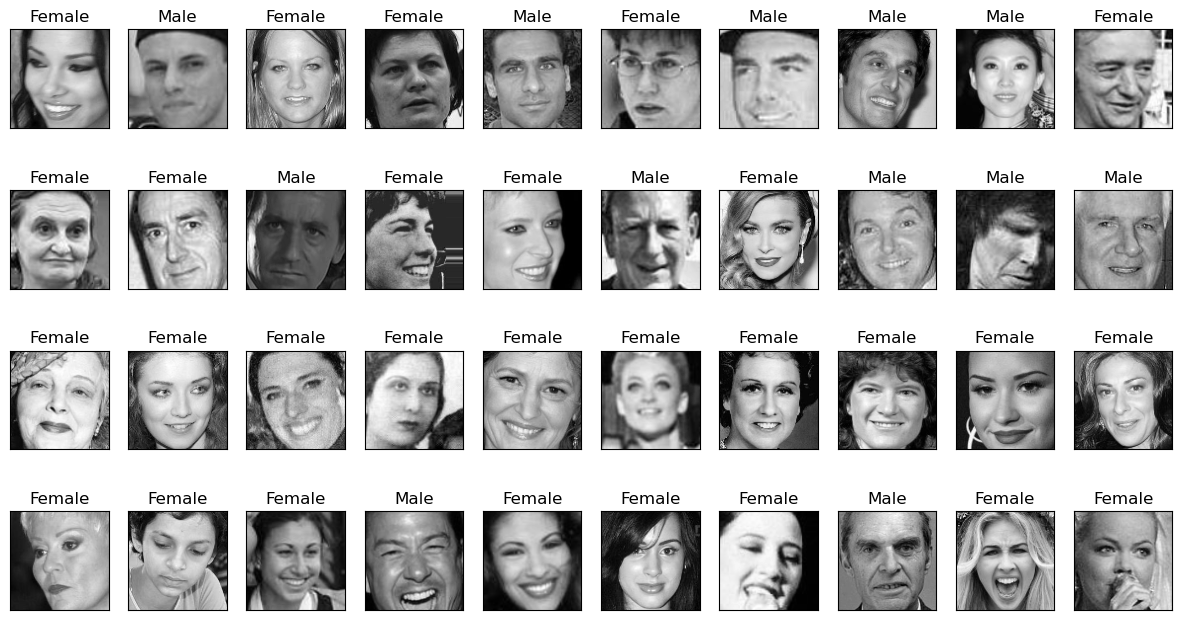

====================Eigen Images====================


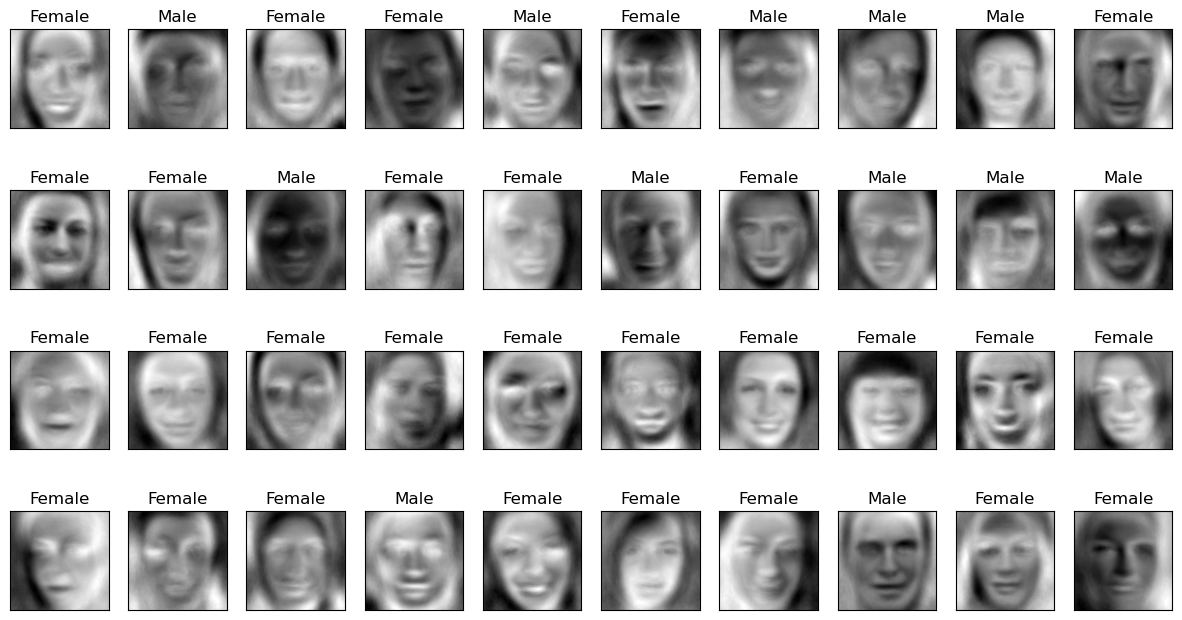

In [28]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    

np.random.randint(1001)
pics = np.random.randint(0 , 5454 , 40)
plt.figure(figsize=(15,8))
for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img , cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img , cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()


In [30]:
## Saving

np.savez("./data/data_pca_50_y_mean.pickle",x_pca_50 , y , X.mean(axis=0))